<h4>Explore How Weather Affects GDP in Service Based Economies</h4>

In [1]:
#import dependencies
import requests 
import json
from pprint import pprint
import os
import pandas as pd
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import sem
from scipy.stats import linregress


Read in Merged GDP, Weather, and Temperature Data


In [2]:
path_weather_temperature_gdp = os.path.join("Resources", "Merge_data_2005-2015.csv")
df = pd.read_csv(path_weather_temperature_gdp)
df["ISO3"] = df["ISO3"].astype("string")
df.head()

,Unnamed: 0,ISO3,Country,Year,Temp_Farenheit,Rainfall_mm,GDP,GDP_md,GDP_bd
0,0,AFG,Afghanistan,2005,56.087945,29.609967,6.209138e+09,6209.137625,6.209138
1,1,AFG,Afghanistan,2006,57.501470,27.120458,6.971286e+09,6971.285595,6.971286
2,2,AFG,Afghanistan,2007,56.320054,25.329681,9.747880e+09,9747.879532,9.747880
3,3,AFG,Afghanistan,2008,56.755070,21.505365,1.010923e+10,10109.225814,10.109226
4,4,AFG,Afghanistan,2009,56.807912,31.106477,1.243909e+10,12439.087077,12.439087


Filter Data Showing only top 10 Service Based Economies

In [3]:
service_ISO3 = ["BHS", "MLT", "BRB", "LUX", "MCO", "MHL", "CYP", "SYC", "LBN", "LCA"]
service_df = df[df.ISO3.isin(service_ISO3)]
service_df.head(100)


,Unnamed: 0,ISO3,Country,Year,Temp_Farenheit,Rainfall_mm,GDP,GDP_md,GDP_bd
121,121,BHS,Bahamas,2005,77.491895,114.312467,9.836200e+09,9836.200000,9.836200
122,122,BHS,Bahamas,2006,77.483210,99.209050,1.016725e+10,10167.250000,10.167250
123,123,BHS,Bahamas,2007,77.924450,134.593108,1.061834e+10,10618.340000,10.618340
124,124,BHS,Bahamas,2008,77.516915,104.026583,1.052600e+10,10526.000000,10.526000
125,125,BHS,Bahamas,2009,77.771615,101.243292,9.981960e+09,9981.960000,9.981960
...,...,...,...,...,...,...,...,...,...
1646,1679,SYC,Seychelles,2012,81.682775,112.592242,1.060226e+09,1060.226126,1.060226
1647,1680,SYC,Seychelles,2013,81.652040,133.600067,1.328158e+09,1328.157609,1.328158
1648,1681,SYC,Seychelles,2014,81.673505,142.798267,1.343008e+09,1343.007841,1.343008
1649,1682,SYC,Seychelles,2015,82.204925,146.287608,1.377495e+09,1377.495052,1.377495


Create Stacked Line Charts for Each of the Countries of Interest Showing GDP, Temp & Prec Changes w/ Respect to Time

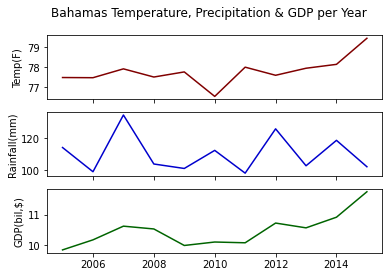

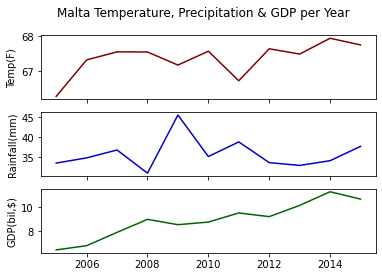

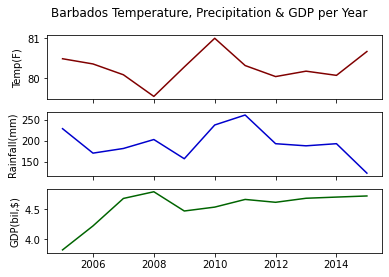

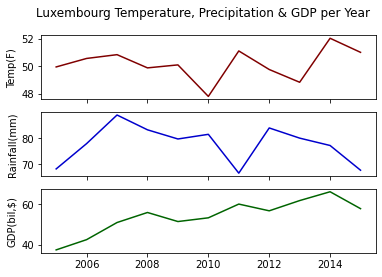

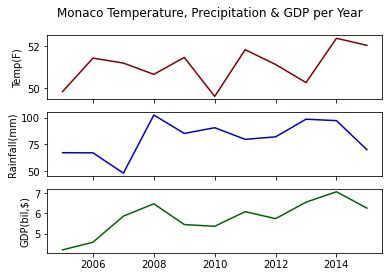

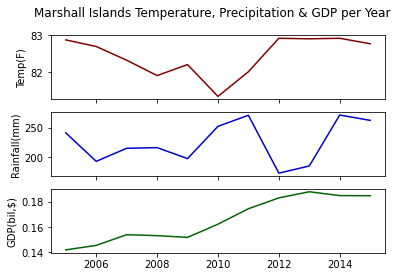

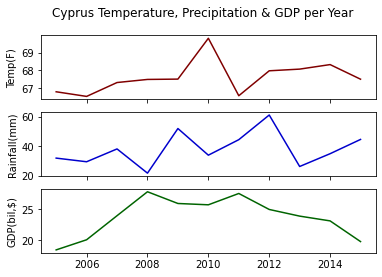

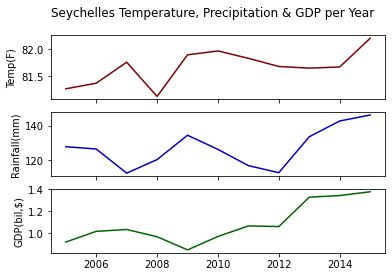

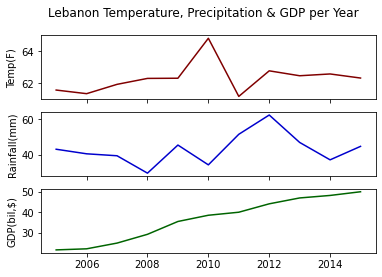

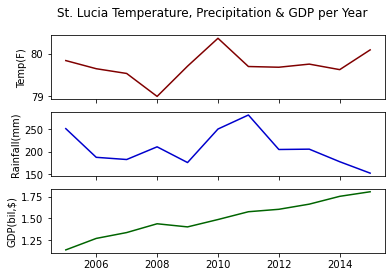

In [4]:
for code in service_ISO3:
    country_df = df[df["ISO3"] == code]
    country_name = country_df.iloc[0]["Country"]
    year_series = country_df["Year"]
    temp_series = country_df["Temp_Farenheit"]
    rain_series = country_df["Rainfall_mm"]
    gdp_series = country_df["GDP_bd"]
    
    fig, axs = plt.subplots(3, sharex=True, sharey=False)
    fig.suptitle(str(country_name) + " Temperature, Precipitation & GDP per Year")
    axs[0].plot(year_series, temp_series, color='Maroon')
    axs[1].plot(year_series, rain_series, color='MediumBlue')
    axs[2].plot(year_series, gdp_series, color='DarkGreen')
    axs[0].set_ylabel('Temp(F)')
    axs[1].set_ylabel('Rainfall(mm)')
    axs[2].set_ylabel('GDP(bil,$)')
    plt.savefig("output_data/Q5/stacked_" + str(country_name + ".png"))

Create a GDP vs Temperature Plot for the top 10 Service Based Countries of Interest

Cov is 0.7752505411258683


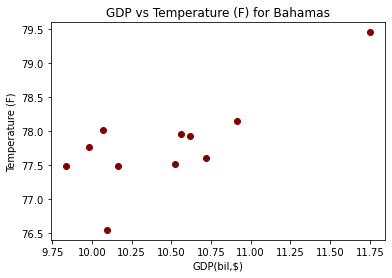

Cov is 0.6290869208195752


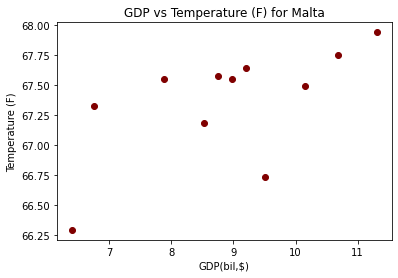

Cov is -0.3576974185344361


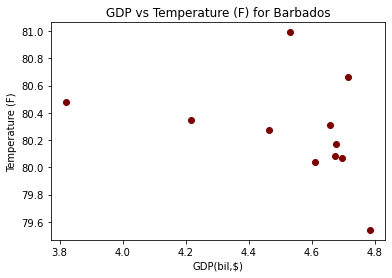

Cov is 0.19153691714722332


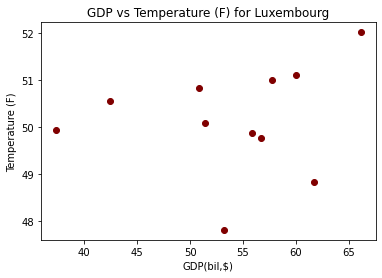

Cov is 0.454699615087423


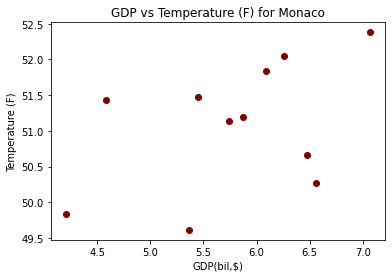

Cov is 0.32364722104246557


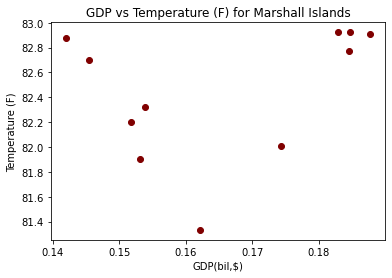

Cov is 0.2853309308312353


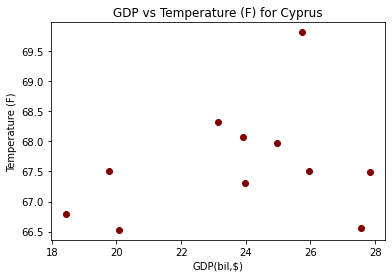

Cov is 0.3585769448134912


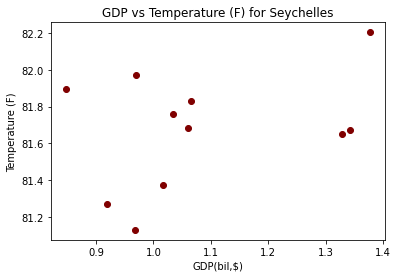

Cov is 0.3778811142806897


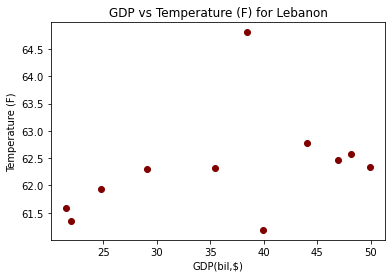

Cov is 0.18806455635537941


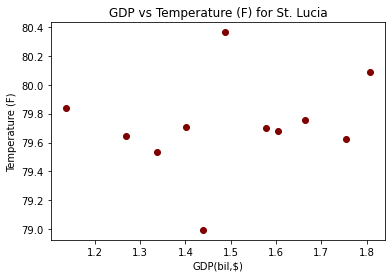

In [5]:
countries = []
correlations = []
for code in service_ISO3:
    country_df = df[df["ISO3"] == code]
    country_name = country_df.iloc[0]["Country"]
    gdp_series = country_df["GDP_bd"]
    temp_series = country_df["Temp_Farenheit"]
    var_df = country_df.corr()
    var_df.head()
    var = var_df.iloc[4]["Temp_Farenheit"]
    plt.figure()
    plt.scatter(gdp_series, temp_series, color='Maroon')
    plt.title("GDP vs Temperature (F) for " + str(country_name))
    plt.xlabel("GDP(bil,$)")
    plt.ylabel("Temperature (F)")
    print(f"Cov is {var}")
    plt.savefig("output_data/Q5/gdpVtemp_" + str(country_name + ".png"))
    plt.show()
    countries.append(str(country_name))
    correlations.append(var)
    

Create a Bar Chart Showing Correlation Between GDP and Temp for the top 10 Service Based Countries of Interest

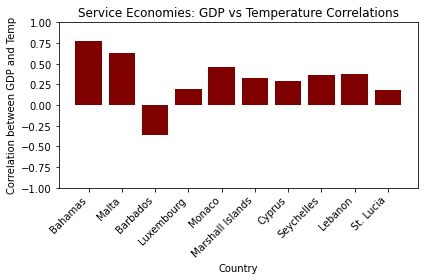

In [6]:
x_pos = [i for i in range(len(countries))]

plt.bar(x_pos, correlations, color='Maroon')
plt.xlabel("Country")
plt.ylabel("Correlation between GDP and Temp")
plt.title("Service Economies: GDP vs Temperature Correlations")
plt.ylim(-1,1)
plt.xticks(x_pos, countries, rotation = 45, ha = "right")
plt.tight_layout()
plt.savefig("output_data/Q5/correlation_gdpVtemp.png")
plt.show()

Create a GDP vs Rainfall Plot for the top 10 Service Based Countries of Interest




Cov is 0.126741186171634


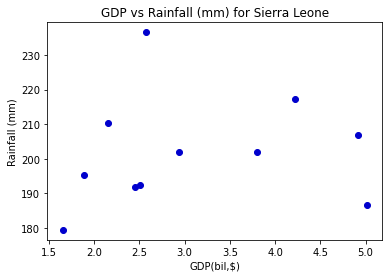

Cov is -0.11967954001902481


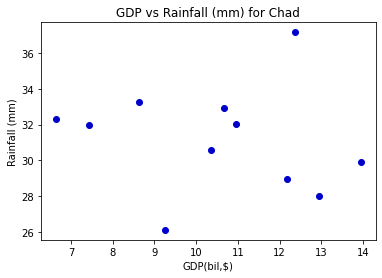

Cov is -0.22527251549312519


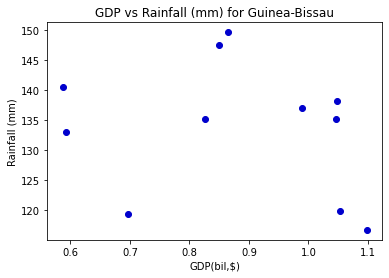

Cov is 0.07959354591402247


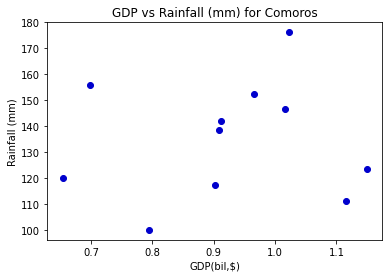

Cov is 0.20485925820869585


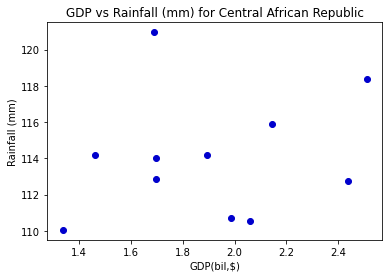

Cov is 0.08675860951755208


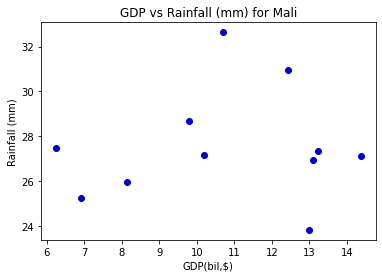

Cov is -0.2615737135468585


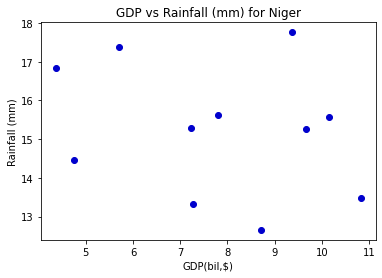

Cov is -0.1455242054145236


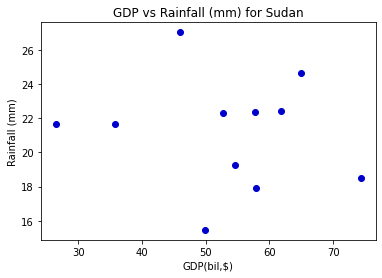

Cov is 0.11368377457690161


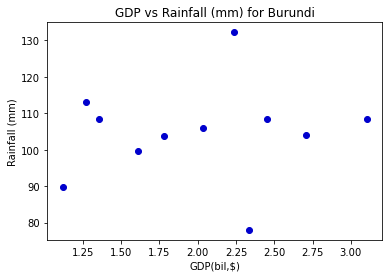

Cov is 0.2769118396172316


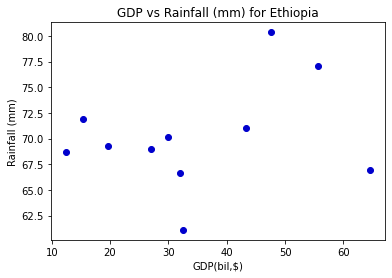

In [7]:
countries = []
correlations = []
for code in service_ISO3:
    country_df = df[df["ISO3"] == code]
    country_name = country_df.iloc[0]["Country"]
    gdp_series = country_df["GDP_bd"]
    rain_series = country_df["Rainfall_mm"]
    var_df = country_df.corr()
    var_df.head()
    var = var_df.iloc[4]["Rainfall_mm"]
    plt.figure()
    plt.scatter(gdp_series, rain_series, color='MediumBlue')
    plt.title("GDP vs Rainfall (mm) for " + str(country_name))
    plt.xlabel("GDP(bil,$)")
    plt.ylabel("Rainfall (mm)")
    print(f"Cov is {var}")
    plt.savefig("output_data/Q5/gdpVrain_" + str(country_name + ".png"))
    plt.show()
    countries.append(str(country_name))
    correlations.append(var)
    

Create a Bar Bhart Showing Correlation Between GDP and Temp for the top 10 Service Based Countries of Interest

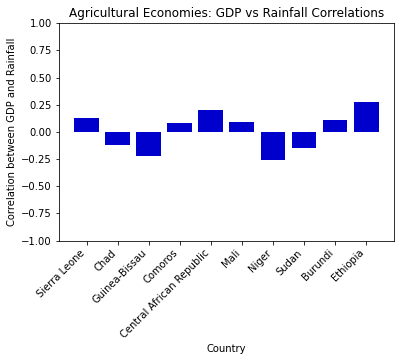

In [8]:
x_pos = [i for i in range(len(countries))]

plt.bar(x_pos, correlations, color='MediumBlue')
plt.xlabel("Country")
plt.ylabel("Correlation between GDP and Rainfall")
plt.title("Agricultural Economies: GDP vs Rainfall Correlations")
plt.ylim(-1,1)
plt.xticks(x_pos, countries, rotation = 45, ha = "right")
plt.savefig("output_data/Q3/correlation_gdpVrain.png")
plt.show()